<a href="https://colab.research.google.com/github/mrdbourke/tensorflow-deep-learning/blob/main/01_neural_network_regression_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow Tutorial

Definition of a [Regression Analysis](https://en.wikipedia.org/wiki/Regression_analysis)

For example:
- Predicting the selling price of houses given other features like number of rooms, size, number of bathrooms, number of bedrooms, etc.
- Predicting the cost of medical insurance for an individual given their demographics (age, sex, gender, race).

In this notebook, we're going to learn take a sample of inputs, build a neural network to discover patterns in those inputs and then make a prediction (in the form of a number) based on those inputs.

## Contents:


- Architecture of a regression model
- Input shapes and output shapes
  - `x`: features/varibles/Independant features (inputs)
  - `y`: labels/target/depandant variable (outputs)
- Creating custom data to view and fit
- Steps in modelling
  - Create a model
  - Compile a model
    - Defining a loss function
    - Setting up an optimizer
    - Creating evaluation metrics
  - Fit a model (find patterns in our data)
- Evaluate the model
  - Visualize the model
  - Look at the training curves
  - Compare predictions to actuals/ground truth


## How to use this notebook

You can read through the descriptions and simply run the code (it should run without errors), but there's a better option.

However, better option is for an hands on experience is to create a new notebook, and rewrite each code line by yourself. Investigate it, see if it fails and throws error. Learn why it fails.

# Architecture of a Neural Network


| **Hyperparameter** | **Typical value** |
| --- | --- |
| Input layer shape | Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction) |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same shape as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (mean square error) or [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) (mean absolute error)/Huber (combination of MAE/MSE) if outliers |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) |



Note: **Hyperparameter** in machine learning is something a developer can set themselves. **Model Parameter** is something a model learns on its own (a value not explicitly set by the developer).



In [1]:
import tensorflow as tf
print(tf.__version__)

2023-11-13 17:44:55.084732: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.11.0


# Creating data to view and fit

Since we're working on a **regression problem** (predicting a number) let's create some linear data to model.

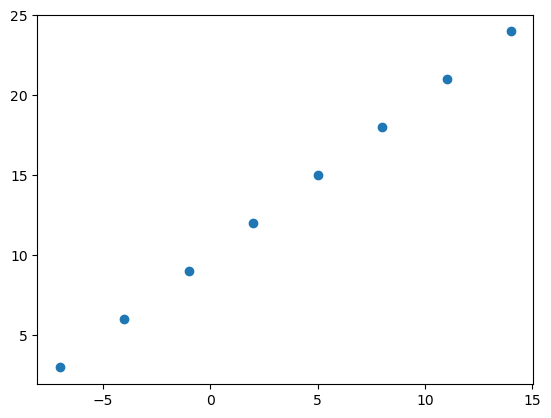

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
x = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(x, y);

Before we do any modelling, can you find the pattern between `x` and `y`?

For example, based on this data what will be the `y` value if `x` was 17?

How about if `x` was -10?

This kind of pattern discover is the essence of what we'll be building neural networks to do for us.

# Input shapes and output shapes

One of the most important concepts when working with neural networks are the input and output shapes.

The **input shape** is the shape of your data that goes into the model.

The **output shape** is the shape of your data you want to come out of your model.

These will differ depending on the problem you're working on.

Neural networks accept numbers and output numbers. These numbers are typically represented as tensors (or arrays).

In [4]:
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

2023-11-13 17:52:26.255432: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
house_info.shape

TensorShape([3])

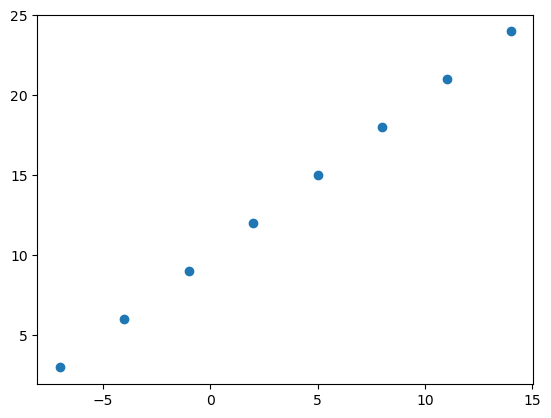

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Create features (using tensors)
x = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(x, y);

In [10]:
x[0]

<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>

# Steps in Modelling

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the [Functional](https://www.tensorflow.org/guide/keras/functional) or [Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential))
2. **Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer). 
3. **Fitting a model** - letting the model try to find patterns in the data (how does `x` relates to `y`). 


In [13]:
# Set random seed to replicate results
# tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])


> **Note:** If you're using [TensorFlow 2.7.0](https://github.com/tensorflow/tensorflow/releases/tag/v2.7.0)+, the `fit()` function no longer upscales input data to go from `(batch_size, )` to `(batch_size, 1)`. To fix this, you'll need to reshape the dimension of input data using `tf.reshape(x, (x.shape[0], 1))`.


In [30]:
# Compile the model
model.compile(loss=tf.keras.losses.mae, # mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD stochastic gradient descent
              metrics=["mae"])


x = tf.reshape(x, (x.shape[0], 1))

# Fit the model
model.fit(x, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 503ms/step - loss: 8.4143 - mae: 8.4143
Epoch 2/5
1/1 [==============================] - 0s 19ms/step - loss: 8.2818 - mae: 8.2818
Epoch 3/5
1/1 [==============================] - 0s 16ms/step - loss: 8.1493 - mae: 8.1493
Epoch 4/5
1/1 [==============================] - 0s 19ms/step - loss: 8.0168 - mae: 8.0168
Epoch 5/5
1/1 [==============================] - 0s 18ms/step - loss: 7.8843 - mae: 7.8843


In [34]:
x[0]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([-7.], dtype=float32)>

### Predict

What do you think the outcome should be if we passed our model an `x` value of 17?

In [36]:
model.predict([[17],[1]])

1/1 [==============================] - 0s 95ms/step


array([[26.630243 ],
       [ 1.8811907]], dtype=float32)

In [38]:
# Make a prediction with the model

# Reshape the input for prediction to match the training data shape
test = np.array([17])
test = test.reshape((1, 1))

# Use the reshaped data for prediction
model.predict(test)

1/1 [==============================] - 0s 32ms/step


array([[26.630243]], dtype=float32)

In [46]:
print('x shape:',x.shape), print('test shape:',test.shape)

x shape: (8, 1)
test shape: (1, 1)


(None, None)

**Question:** What's Keras? We were working with TensorFlow but every time we write TensorFlow code, `keras` comes after `tf` (e.g. `tf.keras.layers.Dense()`)?

Before TensorFlow 2.0+, [Keras](https://keras.io/) was an API designed to be able to build deep learning models with ease. Since TensorFlow 2.0+, its functionality has been tightly integrated within the TensorFlow library.

# Improving a model

To improve our model, we alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose optimization function or perhaps change the **learning rate** of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).


In [47]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


x = tf.reshape(x, (x.shape[0], 1))


# Fit model (this time we'll train for longer)
model.fit(x, y, epochs=100) # train for 50 epochs not 5

Epoch 1/100
1/1 [==============================] - 0s 383ms/step - loss: 8.8412 - mae: 8.8412
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 8.7087 - mae: 8.7087
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 8.5762 - mae: 8.5762
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 8.4437 - mae: 8.4437
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 8.3112 - mae: 8.3112
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 8.1787 - mae: 8.1787
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 8.0462 - mae: 8.0462
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 7.9137 - mae: 7.9137
Epoch 9/100
1/1 [==============================] - 0s 18ms/step - loss: 7.7812 - mae: 7.7812
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 7.6487 - mae: 7.6487
Epoch 11/100
1/1 [==============================] - 0s 26ms/step - los

In [48]:
# Make a prediction with the model

# Reshape the input for prediction to match the training data shape
test = np.array([17])
test = test.reshape((1, 1))

# Try and predict what y would be if X was 17.0
model.predict(test) # the right answer is 27.0 (y = X + 10)

1/1 [==============================] - 0s 70ms/step


array([[29.950916]], dtype=float32)

Much better! 

We got closer this time. But we could still be better.

Now we've trained a model, how could we evaluate it?

# Evaluating a model 

A typical workflow you'll go through when building neural networks is:

```
Build a model -> evaluate it -> tweak the model -> evaulate it -> tweak the model -> evaluate it...
```

In [52]:
# Make a bigger dataset
x = np.arange(-100, 100, 4)
x

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [53]:
# Make labels for the dataset (adhering to the same pattern as before)
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

Since $y=x+10$, we could make the labels like so:

In [54]:
# Same result as above
y = x + 10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

## Split data into training/test set

One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each set serves a specific purpose:
* **Training set** - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
* **Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

We can create them by splitting our `x` and `y` arrays.


In [55]:
# Check how many samples we have
len(x)

50

In [56]:
# Split data into train and test sets
x_train = x[:40] # first 40 examples (80% of data)
y_train = y[:40]

x_test = x[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(x_train), len(x_test)

(40, 10)

## Visualizing the data

Now we've got our training and test data, it's a good idea to visualize it.

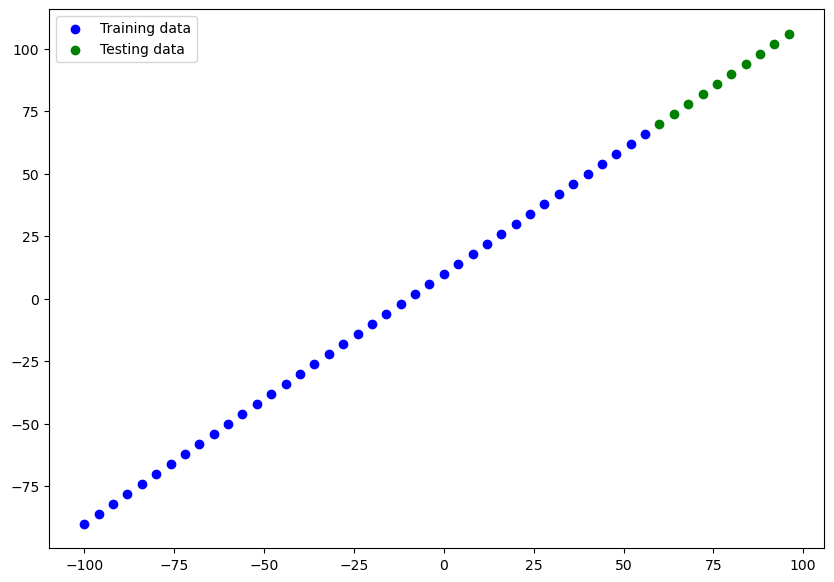

In [58]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(x_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(x_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

In [63]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

x_train = tf.reshape(x_train, (x_train.shape[0], 1))


# Fit model (same as above)
model.fit(x_train, y_train, epochs=50) # commented out on purpose (not fitting it just yet)

Epoch 1/50
2/2 [==============================] - 0s 11ms/step - loss: 12.1883 - mae: 12.1883
Epoch 2/50
2/2 [==============================] - 0s 14ms/step - loss: 13.0141 - mae: 13.0141
Epoch 3/50
2/2 [==============================] - 0s 17ms/step - loss: 11.6592 - mae: 11.6592
Epoch 4/50
2/2 [==============================] - 0s 18ms/step - loss: 9.3415 - mae: 9.3415
Epoch 5/50
2/2 [==============================] - 0s 23ms/step - loss: 10.2179 - mae: 10.2179
Epoch 6/50
2/2 [==============================] - 0s 9ms/step - loss: 9.4735 - mae: 9.4735
Epoch 7/50
2/2 [==============================] - 0s 11ms/step - loss: 8.6056 - mae: 8.6056
Epoch 8/50
2/2 [==============================] - 0s 9ms/step - loss: 9.0411 - mae: 9.0411
Epoch 9/50
2/2 [==============================] - 0s 10ms/step - loss: 18.8517 - mae: 18.8517
Epoch 10/50
2/2 [==============================] - 0s 8ms/step - loss: 10.1654 - mae: 10.1654
Epoch 11/50
2/2 [==============================] - 0s 15ms/step - loss

## Visualizing the model

After you've built a model, you might want to take a look at it (especially if you haven't built many before).

You can take a look at the layers and shapes of your model by calling [`summary()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#summary) on it.

> 🔑 **Note:** Visualizing a model is particularly helpful when you run into input and output shape mismatches.

In [64]:
# Doesn't work (model not fit/built)
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Calling `summary()` on our model shows us the layers it contains, the output shape and the number of parameters.
* **Total params** - total number of parameters in the model.
* **Trainable parameters** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable parameters** - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

**Exercise:** Try playing around with the number of hidden units in the `Dense` layer (e.g. `Dense(2)`, `Dense(3)`). How does this change the Total/Trainable params? 

## Visualizing the predictions

Now we've got a trained model, let's visualize some predictions.

To visualize predictions, it's always a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` vs. `y_pred` (ground truth vs. predictions).

First, we'll make some predictions on the test data (`x_test`), remember the model has never seen the test data.

In [67]:
# Make predictions

# Reshape the input for prediction to match the training data shape

x_test = x_test.reshape((x_test.shape[0], 1))

y_pred = model.predict(x_test)

1/1 [==============================] - 0s 70ms/step


In [68]:
# View the predictions
y_pred

array([[ 67.699104],
       [ 72.168335],
       [ 76.637566],
       [ 81.1068  ],
       [ 85.576035],
       [ 90.045265],
       [ 94.514496],
       [ 98.98373 ],
       [103.45296 ],
       [107.92219 ]], dtype=float32)

In [69]:
def plot_predictions(train_data=x_train, 
                     train_labels=y_train, 
                     test_data=x_test, 
                     test_labels=y_test, 
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

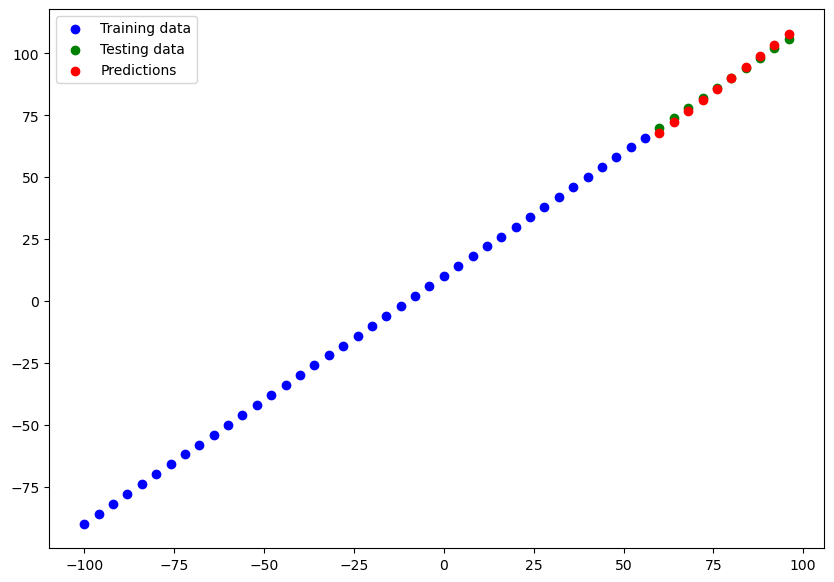

In [71]:
plot_predictions(train_data=x_train,
                 train_labels=y_train,
                 test_data=x_test,
                 test_labels=y_test,
                 predictions=y_pred)

From the plot we can see our predictions are good.

## Evaluating predictions

Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics. 

Two of the main metrics used for regression problems are:
* **Mean absolute error (MAE)** - the mean difference between each of the predictions.
* **Mean squared error (MSE)** - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).

The lower each of these values, the better.

In [73]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_test, y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([20.300896, 16.265331, 13.217461, 11.157282, 10.084793, 10.009053,
       11.005798, 12.990236, 15.962366, 19.922188], dtype=float32)>

That's strange, MAE should be a single output.

Instead, we get 10 values.

This is because our `y_test` and `y_pred` tensors are different shapes.

In [74]:
# Check the test label tensor values
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [76]:
# Check the predictions tensor values (notice the extra square brackets)
y_pred

array([[ 67.699104],
       [ 72.168335],
       [ 76.637566],
       [ 81.1068  ],
       [ 85.576035],
       [ 90.045265],
       [ 94.514496],
       [ 98.98373 ],
       [103.45296 ],
       [107.92219 ]], dtype=float32)

In [77]:
# Check the tensor shapes
y_test.shape, y_pred.shape

((10,), (10, 1))

Dealing with different input and output shapes is one the most common issues you'll come across, this is one of those times.

We can fix it using [`squeeze()`](https://www.tensorflow.org/api_docs/python/tf/squeeze), it'll remove the the `1` dimension from our `y_pred` tensor, making it the same shape as `y_test`.

> **Note:** If you're comparing two tensors, it's important to make sure they're the right shape(s) (you won't always have to manipulate the shapes, but always be on the look out, *many* errors are the result of mismatched tensors, especially mismatched input and output shapes).

In [78]:
# Shape before squeeze()
y_pred.shape

(10, 1)

In [81]:
# Shape after squeeze()
y_pred = y_pred.squeeze()
y_pred.shape

(10,)

In [83]:
# What do they look like?
y_test, y_pred

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([ 67.699104,  72.168335,  76.637566,  81.1068  ,  85.576035,
         90.045265,  94.514496,  98.98373 , 103.45296 , 107.92219 ],
       dtype=float32))

Okay, now we know how to make our `y_test` and `y_preds` tenors the same shape, let's use our evaluation metrics.

In [85]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_test, y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.1730797>

## Running experiments to improve a model

After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:
1. **Get more data** - get more examples for your model to train on (more opportunities to learn patterns).
2. **Make your model larger (use a more complex model)** - this might come in the form of more layers or more hidden units in each layer.
3. **Train for longer** - give your model more of a chance to find the patterns in the data.

Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:
1. `model_1` - same as original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

**Build `model_1`**

# Saving a model

Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

You can save a TensorFlow/Keras model using [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

There are two ways to save a model in TensorFlow:
1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the SavedModel format will suffice most of the time.

Both methods use the same method call.

In [ ]:
# Save a model using the SavedModel format
model.save('best_model_SavedModel_format')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


# Loading a model

We can load a saved model using the [`load_model()`](https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model) method.

Loading a model for the different formats (SavedModel and HDF5) is the same (as long as the pathnames to the particuluar formats are correct).

In [ ]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


Now let's test it out.

# A larger example

We have seen the fundamentals of building neural network regression models in TensorFlow.

Let's build a model for a more feature rich database.

More specifically we're going to try predict the cost of medical insurance for individuals based on a number of different parameters such as, `age`, `sex`, `bmi`, `children`, `smoking_status` and `residential_region`.

To do, we'll leverage the pubically available [Medical Cost dataset](https://www.kaggle.com/mirichoi0218/insurance) available from Kaggle and [hosted on GitHub](https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv).


In [88]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [90]:
# Check out the insurance dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We're going to have to turn the non-numerical columns into numbers (because a neural network can't handle non-numerical inputs).

To do so, we'll use the [`get_dummies()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) method in pandas.

It converts categorical variables (like the `sex`, `smoker` and `region` columns) into numerical variables using one-hot encoding.

In [91]:
# Turn all categories into numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head() # view the converted columns

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


Now we'll split data into features (`x`) and labels (`y`).

In [93]:
# Create x & y values
x = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [97]:
# View features
x.shape, y.shape

((1338, 11), (1338,))

And create training and test sets. We could do this manually, but to make it easier, we'll leverage the already available [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function available from Scikit-Learn.

In [98]:
# Create training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) # set random state for reproducible splits

Now we can build and fit a model. We will call it `tfmodel`

In [99]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
tfmodel = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
tfmodel.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# Fit the model
tfmodel.fit(x_train, y_train, epochs=50)

Epoch 1/50
34/34 [==============================] - 1s 2ms/step - loss: 9007.9980 - mae: 9007.9980
Epoch 2/50
34/34 [==============================] - 0s 3ms/step - loss: 7836.0171 - mae: 7836.0171
Epoch 3/50
34/34 [==============================] - 0s 2ms/step - loss: 7611.3599 - mae: 7611.3599
Epoch 4/50
34/34 [==============================] - 0s 10ms/step - loss: 7667.2832 - mae: 7667.2832
Epoch 5/50
34/34 [==============================] - 0s 4ms/step - loss: 7716.3193 - mae: 7716.3193
Epoch 6/50
34/34 [==============================] - 0s 3ms/step - loss: 7645.2202 - mae: 7645.2202
Epoch 7/50
34/34 [==============================] - 0s 3ms/step - loss: 7521.3159 - mae: 7521.3159
Epoch 8/50
34/34 [==============================] - 0s 3ms/step - loss: 7684.5215 - mae: 7684.5215
Epoch 9/50
34/34 [==============================] - 0s 4ms/step - loss: 7488.3770 - mae: 7488.3770
Epoch 10/50
34/34 [==============================] - 0s 3ms/step - loss: 7714.0029 - mae: 7714.0029
Epoch 11

In [101]:
# Check the results of the insurance model
tfmodel.evaluate(x_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8589.6152 - mae: 8589.6152


[8589.615234375, 8589.615234375]

This tells us that our predictions on average are off by $8590

Can we improve? Let's try a bigger model.

We'll try 3 things:
- Increasing the number of layers (2 -> 3).
- Increasing the number of units in each layer (except for the output layer).
- Changing the optimizer (from SGD to Adam).

Everything else will stay the same.

In [102]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
tfmodel_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
tfmodel_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = tfmodel_2.fit(x_train, y_train, epochs=100, verbose=0)

In [103]:
# Evaluate our larger model
tfmodel_2.evaluate(x_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 5058.6069 - mae: 5058.6069


[5058.60693359375, 5058.60693359375]

Much better! Using a larger model and the Adam optimizer results in almost half the error as the previous model.

> **Note:**For many problems, the [Adam optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) is a great starting choice. See Andrei Karpathy's "Adam is safe" point from [*A Recipe for Training Neural Networks*](http://karpathy.github.io/2019/04/25/recipe/) for more. 

Let's check out the loss curves of our model, we should see a downward trend.

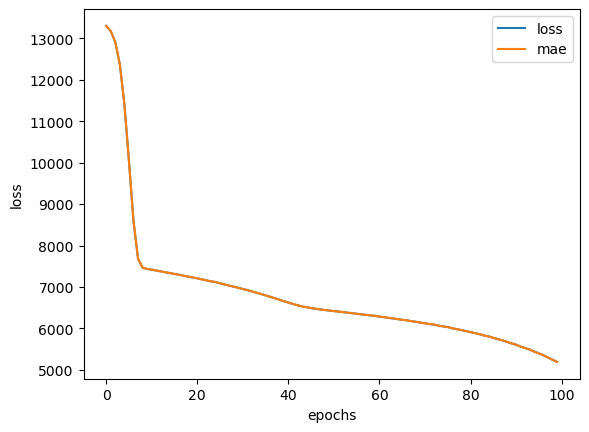

In [104]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

From this, it looks like our model's loss (and MAE) were both still decreasing (in our case, MAE and loss are the same, hence the lines in the plot overlap eachother).

What this tells us is the loss might go down if we try training it for longer.

> 🤔 **Question:** How long should you train for? 

> It depends on what problem you're working on. Sometimes training won't take very long, other times it'll take longer than you expect. A common method is to set your model training for a very long time (e.g. 1000's of epochs) but set it up with an [EarlyStopping callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) so it stops automatically when it stops improving. We'll see this in another module.

Let's train the same model as above for a little longer. We can do this but calling fit on it again.

In [105]:
# Try training for a little longer (100 more epochs)
history_2 = tfmodel_2.fit(x_train, y_train, epochs=100, verbose=0) #verbose=0 revents from printing the status

How did the extra training go?

In [106]:
# Evaluate the model trained for 200 total epochs
tfmodel_2_loss, tfmodel_2_mae = tfmodel_2.evaluate(x_test, y_test)
tfmodel_2_loss, tfmodel_2_mae

9/9 [==============================] - 0s 2ms/step - loss: 3508.0488 - mae: 3508.0488


(3508.048828125, 3508.048828125)

Awesome! Training for an extra 100 epochs we see about a 10% decrease in error.

How does the visual look?

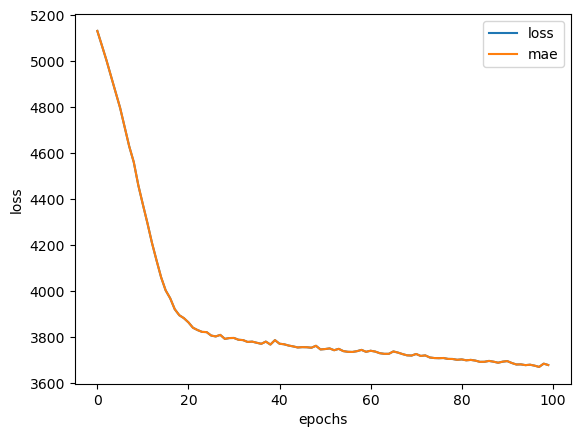

In [107]:
# Plot the model trained for 200 total epochs loss curves
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); # note: epochs will only show 100 since we overrid the history variable

## Preprocessing data (normalization and standardization)

A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

This practice is called **normalization** (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process call **standardization** which converts all of your data to unit variance and 0 mean.

These two practices are often part of a preprocessing pipeline (a series of functions to prepare your data for use with neural networks).

Knowing this, some of the major steps you'll take to preprocess your data for a neural network include:
* Turning all of your data to numbers (a neural network can't handle strings).
* Making sure your data is in the right shape (verifying input and output shapes).
* [**Feature scaling**](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler):
    * Normalizing data (making sure all values are between 0 and 1). This is done by subtracting the minimum value then dividing by the maximum value minus the minmum. This is also referred to as min-max scaling.
    * Standardization (making sure all values have a mean of 0 and a variance of 1). This is done by substracting the mean value from the target feature and then dividing it by the standard deviation.
    * Which one should you use?
      * **With neural networks you'll tend to favour normalization** as they tend to prefer values between 0 and 1 (you'll see this espcially with image processing), however, you'll often find a neural network can perform pretty well with minimal feature scaling.

We've already turned our data into numbers using `get_dummies()`, let's see how we'd normalize it as well.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [108]:
# Check out the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Now, just as before, we need to transform the non-numerical columns into numbers and this time we'll also be normalizing the numerical columns with different ranges (to make sure they're all between 0 and 1).

To do this, we're going to use a few classes from Scikit-Learn:
* [`make_column_transformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html) - build a multi-step data preprocessing function for the folllowing trnasformations:
  * [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) - make sure all numerical columns are normalized (between 0 and 1).
  * [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) - one hot encode the non-numerical columns.

Let's see them in action.

In [109]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create x & y
x = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(x_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

Now we've normalized it and one-hot encoding it, what does our data look like now?

In [110]:
# Non-normalized and non-one-hot encoded data example
x_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [111]:
# Normalized and one-hot encoded example
x_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

How about the shapes?

In [112]:
# Notice the normalized/one-hot encoded shape is larger because of the extra columns
x_train_normal.shape, x_train.shape

((1070, 11), (1070, 6))

Our data is normalized and numerical, let's model it.

We'll use the same model as `insurance_model_2`.

In [113]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
tfmodel_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
tfmodel_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
tfmodel_3.fit(x_train_normal, y_train, epochs=200, verbose=0) 

Let's evaluate the model on normalized test set.

In [114]:
# Evaulate 3rd model
tfmodel_3_loss, tfmodel_3_mae = tfmodel_3.evaluate(x_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3167.5684 - mae: 3167.5684


And finally, let's compare the results from `insurance_model_2` (trained on non-normalized data) and `insurance_model_3` (trained on normalized data).

In [115]:
# Compare modelling results from non-normalized data and normalized data
tfmodel_2_mae, tfmodel_3_mae

(3508.048828125, 3167.568359375)

From this we can see normalizing the data results in 10% less error using the same model than not normalizing the data.

This is **one of the main benefits of normalization: faster convergence time** (a fancy way of saying, your model gets to better results faster).

`tfmodel_2` may have eventually achieved the same results as `tfmodel_3` if we left it training for longer. 

Also, the results may change if we were to alter the architectures of the models, e.g. more hidden units per layer or more layers.

But since our main goal as neural network practioners is to decrease the time between experiments, anything that helps us get better results sooner is a plus.

# Exercise

1. Import the [Boston pricing dataset](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data) from TensorFlow [`tf.keras.datasets`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) and model it.

2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?
3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
  * Building a larger model (how does one with 4 dense layers go?).
  * Increasing the number of units in each layer.
  * Lookup the documentation of [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) and find out what the first parameter is, what happens if you increase it by 10x?
  * What happens if you train for longer (say 300 epochs instead of 200)? 